### This project investigates whether news sentiment can predict short-term stock returns across four major companies, and compares which firms are most sensitive to news

### Hypotheses

To understand the relationship between news sentiment and stock returns, we test the following hypotheses:

### Same-day Effect

H₀: News sentiment has no correlation with same-day stock returns.

H₁: News sentiment is correlated with same-day stock returns.

### Lag-1 Effect (Next Day)

H₀: News sentiment today has no correlation with next-day returns.

H₁: News sentiment today is correlated with next-day returns.

### Lag-2 Effect

H₀: News sentiment has no correlation with stock returns two days later.

H₁: News sentiment has a measurable correlation with returns two days later.

### Company Sensitivity

H₀: All companies respond to news sentiment in the same way.

H₁: Some companies are more sensitive to news sentiment than others.

In [11]:
import pandas as pd
import sys
sys.path.append(r'C:\Users\SHWETA\Sentiment_analysis')
from data.fetch_data import Fetch_data
from data.fetch_stocks import stock_prices
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
import pickle

with open("entity.pkl", "rb") as f:
    entity_df_1, entity_stocks_1 = pickle.load(f)

with open("entity_data_20250923_230523.pkl", "rb") as f:
    entity_df_2, entity_stocks_2 = pickle.load(f)


print("Available entities in first file:", list(entity_df_1.keys()))
print("Available entities in second file:", list(entity_df_2.keys()))

EOFError: Ran out of input

In [4]:
# Boeing
be_df = pd.concat([entity_df_1['Boeing'], entity_df_2['Boeing']])
be_df = be_df.drop_duplicates().reset_index(drop=True)

# Alphabet
ab_df = pd.concat([entity_df_1['Alphabet'], entity_df_2['Alphabet']])
ab_df = ab_df.drop_duplicates().reset_index(drop=True)

# Apple
ap_df = pd.concat([entity_df_1['Apple'], entity_df_2['Apple']])
ap_df = ap_df.drop_duplicates().reset_index(drop=True)

# Tesla
ts_df = pd.concat([entity_df_1['Tesla'], entity_df_2['Tesla']])
ts_df = ts_df.drop_duplicates().reset_index(drop=True)



NameError: name 'pd' is not defined

In [ ]:
boeing_df = be_df[(be_df['title_en'].str.contains('Boeing', case=False, na=False)) | (be_df['description_en'].str.contains('Boeing',case=False,na=False))]
alphabet_df = ab_df[(ab_df['title_en'].str.contains('Alphabet',case=False,na=False)) | (ab_df['description_en'].str.contains('Alphabet',case=False,na=False))]
apple_df = ap_df[(ap_df['title_en'].str.contains('Apple',case=False,na=False)) | (ap_df['description_en'].str.contains('Apple',case=False,na=False))]
tesla_df = ts_df[(ts_df['title_en'].str.contains('Tesla',case=False,na=False)) | (ts_df['description_en'].str.contains('Tesla',case=False,na=False))]

In [ ]:
sia = SentimentIntensityAnalyzer()
dfs = [tesla_df,alphabet_df,boeing_df,apple_df]
for ent in dfs:
    ent['title_sentiment'] = ent['title_en'].astype(str).apply(lambda text : sia.polarity_scores(text)['compound'])
    ent['description_sentiment'] = ent['description_en'].astype(str).apply(lambda text : sia.polarity_scores(text)['compound'])
    ent['overall_sentiment'] = ent[['title_sentiment', 'description_sentiment']].mean(axis=1)


    ent['sentiment_label'] = ent['overall_sentiment'].apply(
        lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
    )

C:\Users\SHWETA\AppData\Local\Temp\ipykernel_20676\4209729653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent['title_sentiment'] = ent['title_en'].astype(str).apply(lambda text : sia.polarity_scores(text)['compound'])
C:\Users\SHWETA\AppData\Local\Temp\ipykernel_20676\4209729653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ent['description_sentiment'] = ent['description_en'].astype(str).apply(lambda text : sia.polarity_scores(text)['compound'])
C:\Users\SHWETA\AppData\Local\Temp\ipykernel_206

In [ ]:
# Stocks DataFrames for each company
boeing_stocks_df = pd.concat([entity_stocks_1['Boeing'], entity_stocks_2['Boeing']]).drop_duplicates()
alphabet_stocks_df = pd.concat([entity_stocks_1['Alphabet'], entity_stocks_2['Alphabet']]).drop_duplicates()
apple_stocks_df   = pd.concat([entity_stocks_1['Apple'], entity_stocks_2['Apple']]).drop_duplicates()
tesla_stocks_df   = pd.concat([entity_stocks_1['Tesla'], entity_stocks_2['Tesla']]).drop_duplicates()

stocks_list = [boeing_stocks_df,apple_stocks_df,tesla_stocks_df,alphabet_stocks_df]
for comp in stocks_list:
    comp.columns = comp.columns.get_level_values(0)
    comp.reset_index()
    

apple_stocks_df

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-08-04,203.119492,207.644355,201.451371,204.278165,75109300
2025-08-05,202.689957,205.107211,201.930824,203.169408,44155100
2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200
2025-08-13,233.330002,235.000000,230.429993,231.070007,69878500
2025-08-14,232.779999,235.119995,230.850006,234.059998,51916300


In [ ]:

# moderna_daily_sentiment = pd.DataFrame(moderna_df.groupby(['date'])['overall_sentiment'].mean().reset_index())
# moderna_daily_sentiment['date'] = pd.to_datetime(moderna_daily_sentiment['date'])

apple_daily_sentiment = pd.DataFrame(apple_df.groupby(['date'])['overall_sentiment'].mean().reset_index())
apple_daily_sentiment['date'] = pd.to_datetime(apple_daily_sentiment['date'])

tesla_daily_sentiment = pd.DataFrame(tesla_df.groupby(['date'])['overall_sentiment'].mean().reset_index())
tesla_daily_sentiment['date'] = pd.to_datetime(tesla_daily_sentiment['date'])

boeing_daily_sentiment = pd.DataFrame(boeing_df.groupby(['date'])['overall_sentiment'].mean().reset_index())
boeing_daily_sentiment['date'] = pd.to_datetime(boeing_daily_sentiment['date'])

alphabet_daily_sentiment = pd.DataFrame(alphabet_df.groupby(['date'])['overall_sentiment'].mean().reset_index())
alphabet_daily_sentiment['date'] = pd.to_datetime(alphabet_daily_sentiment['date'])

apple_daily_sentiment

,date,overall_sentiment
0,2025-08-04,0.245925
1,2025-08-05,-0.250025
2,2025-08-06,-0.148000
3,2025-08-08,0.145550
4,2025-08-11,0.129112
5,2025-08-12,-0.126275
6,2025-08-13,0.423733
7,2025-08-14,-0.034175
8,2025-08-19,0.056575
9,2025-08-20,-0.148000


In [ ]:
apple_merged_df = pd.merge(apple_daily_sentiment,apple_stocks_df,left_on='date',right_on='Date',how= 'inner')
apple_merged_df['return'] = apple_merged_df['Close'].pct_change()
apple_merged_df['Sentiment_Lag1'] = apple_merged_df['overall_sentiment'].shift(1)
apple_merged_df['Sentiment_Lag2'] = apple_merged_df['overall_sentiment'].shift(4)
apple_merged_df['Sentiment_Adv1'] = apple_merged_df['overall_sentiment'].shift(-1) 


tesla_merged_df = pd.merge(tesla_daily_sentiment,tesla_stocks_df,left_on='date',right_on='Date',how= 'inner')
tesla_merged_df['return'] = tesla_merged_df['Close'].pct_change()
tesla_merged_df['Sentiment_Lag1'] = tesla_merged_df['overall_sentiment'].shift(1)
tesla_merged_df['Sentiment_Lag2'] = tesla_merged_df['overall_sentiment'].shift(4)
tesla_merged_df['Sentiment_Adv1'] = tesla_merged_df['overall_sentiment'].shift(-1)


boeing_merged_df = pd.merge(boeing_daily_sentiment,boeing_stocks_df,left_on='date',right_on='Date',how= 'inner')
boeing_merged_df['return'] = boeing_merged_df['Close'].pct_change()
boeing_merged_df['Sentiment_Lag1'] = boeing_merged_df['overall_sentiment'].shift(1)
boeing_merged_df['Sentiment_Lag2'] = boeing_merged_df['overall_sentiment'].shift(4)
boeing_merged_df['Sentiment_Adv1'] = boeing_merged_df['overall_sentiment'].shift(-1) 



alphabet_merged_df = pd.merge(alphabet_daily_sentiment,alphabet_stocks_df,left_on='date',right_on='Date',how= 'inner')
alphabet_merged_df['return'] = alphabet_merged_df['Close'].pct_change()
alphabet_merged_df['Sentiment_Lag1'] = alphabet_merged_df['overall_sentiment'].shift(1)
alphabet_merged_df['Sentiment_Lag2'] = alphabet_merged_df['overall_sentiment'].shift(4)
alphabet_merged_df['Sentiment_Adv1'] = alphabet_merged_df['overall_sentiment'].shift(-1) 


## Exploratory Data Analysis (EDA)

Before building models, we explore the sentiment and stock data to identify patterns and insights.  

1. **Sentiment Distribution**  
   - We check whether news coverage is mostly positive or negative for each company.  
   - Helps identify bias in media reporting.  

2. **Trends Over Time**  
   - Plot sentiment scores alongside stock prices.  
   - This shows whether negative sentiment spikes align with price drops.  

3. **Correlation Analysis**  
   - Compute correlation between sentiment and returns (same-day, lag-1, lag-2).  
   - This helps us understand if the market reacts immediately or with a delay.  

4. **Company Comparison**  
   - Compare results across Apple, Tesla, Microsoft, and Amazon.  
   - This reveals which companies are more news-sensitive.  


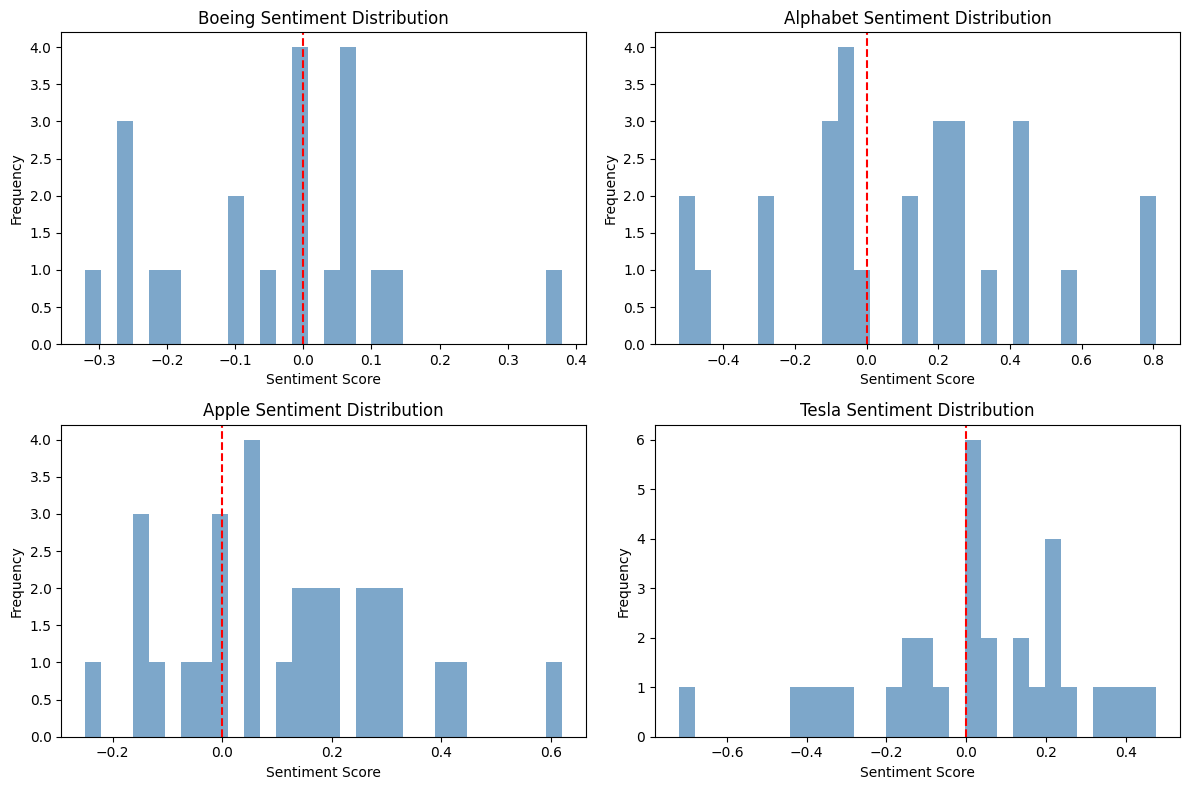

In [ ]:
import matplotlib.pyplot as plt

# Dictionary with company DataFrames
company_dfs = {
    "Boeing": boeing_merged_df,
    "Alphabet": alphabet_merged_df,
    "Apple": apple_merged_df,
    "Tesla": tesla_merged_df
}

plt.figure(figsize=(12, 8))

for i, (company, df) in enumerate(company_dfs.items(), 1):
    plt.subplot(2, 2, i)  # 2x2 grid for 4 companies
    plt.hist(df['overall_sentiment'], bins=30, alpha=0.7, color='steelblue')
    plt.title(f"{company} Sentiment Distribution")
    plt.xlabel("Sentiment Score")
    plt.ylabel("Frequency")
    plt.axvline(0, color='red', linestyle='--')  # Neutral sentiment line

plt.tight_layout()
plt.show()


### Sentiment Analysis Overview

**Tesla:** Average sentiment slightly positive.CEO Elon Musk announced plans to scale back his role in the Department of Government Efficiency **(DOGE)**, focusing more on Tesla operations, which was positively received by investors.

**Boeing:** Average sentiment slightly negative. This could reflect operational issues, safety concerns like recent **AirIndia crash** in Gujrat.

**Apple:** Average sentiment slightly on the positive side as Apple roars back with stronger-than-expected iPhone sales and ***record $94 billion third-quarter revenue***.

**Alphabet:** Average sentiment moderately positive likely driven by a landmark ***antitrust victory*** and renewed focus on AI innovation. A U.S. court ruling spared Google from being forced to divest key assets like Chrome and Android, boosting investor confidence

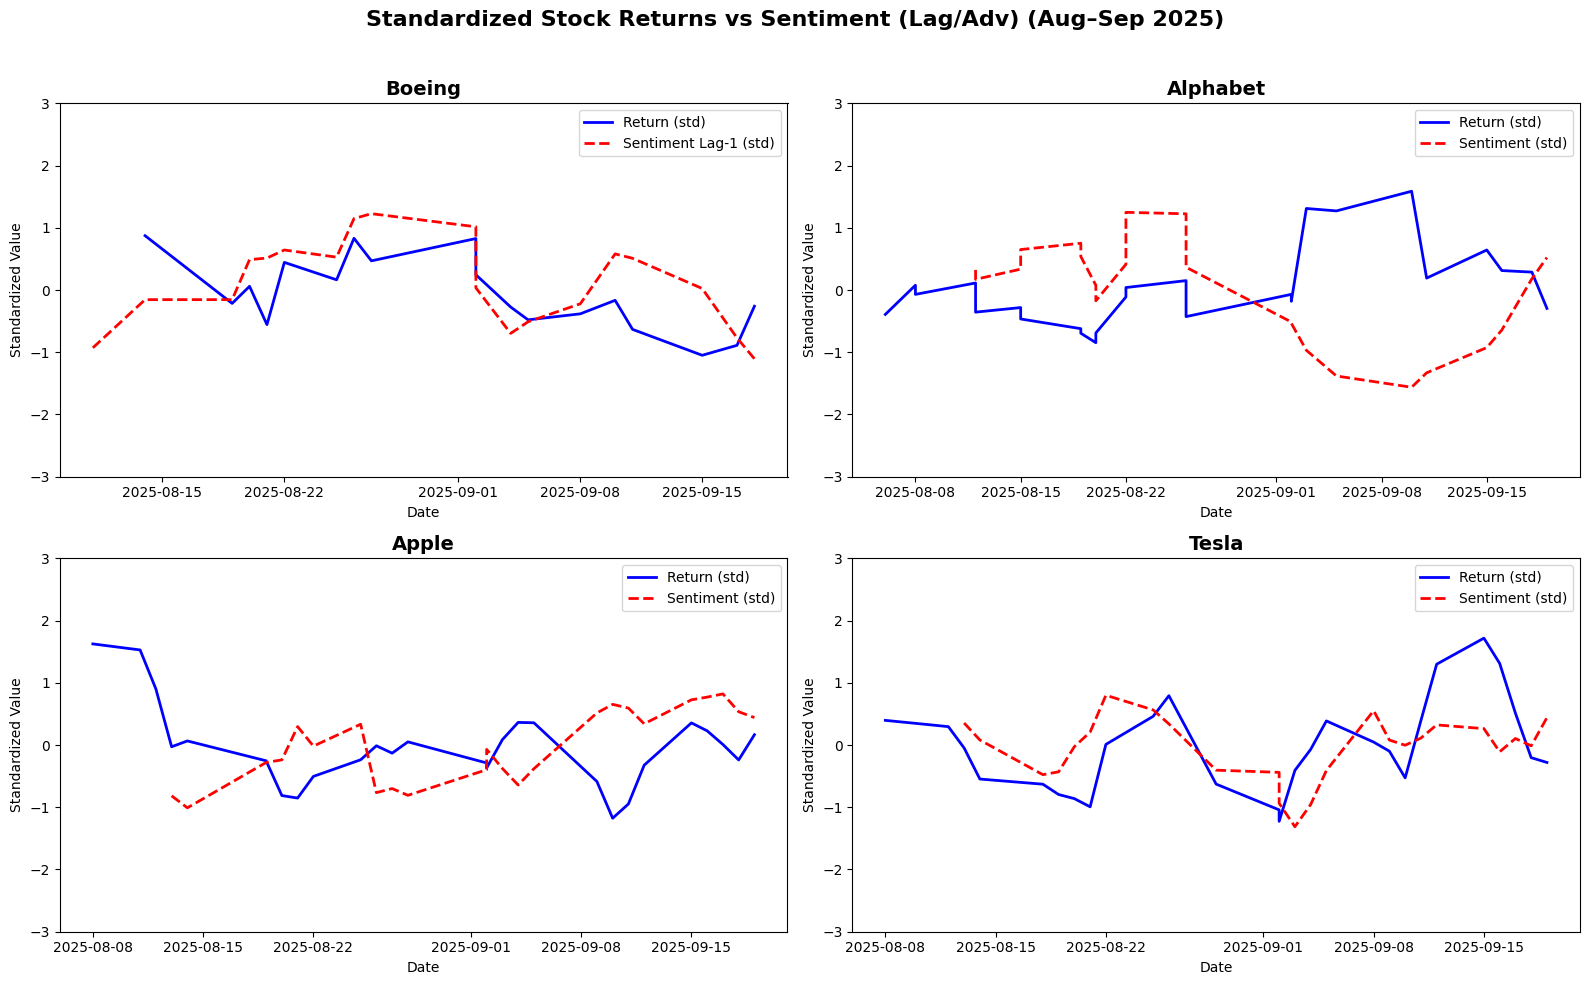

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


fig, axes = plt.subplots(2, 2, figsize=(16,10))
fig.suptitle("Standardized Stock Returns vs Sentiment (Lag/Adv) (Aug–Sep 2025)", 
             fontsize=16, fontweight="bold")

scaler = StandardScaler()

for ax, (company, df) in zip(axes.flatten(), company_dfs.items()):
    df_std = df.copy()
    
    # Pick correct sentiment column
    if company == "Apple" or company == "Alphabet":
        sentiment_col = "Sentiment_Adv1"
        sentiment_label = "Sentiment Adv-1 (std)"
    if company == "Boeing":
        sentiment_col = "overall_sentiment"
        sentiment_label = "Sentiment Lag-1 (std)"
    else:
        sentiment_col = "Sentiment_Lag2"
        sentiment_label = "Sentiment (std)"
    
    # Standardize return + chosen sentiment column
    df_std[['return', sentiment_col]] = scaler.fit_transform(
        df_std[['return', sentiment_col]]
    )
    
    # Apply rolling average (3-day smoothing)
    df_std['return_smooth'] = df_std['return'].rolling(3).mean()
    df_std['sentiment_smooth'] = df_std[sentiment_col].rolling(3).mean()
    
    # Plot return
    ax.plot(df_std['date'], df_std['return_smooth'], 
            label="Return (std)", color="blue", linewidth=2, linestyle="-")
    
    # Plot sentiment
    ax.plot(df_std['date'], df_std['sentiment_smooth'], 
            label=sentiment_label, color="red", linewidth=2, linestyle="--")
    
    ax.set_title(company, fontsize=14, fontweight="bold")
    ax.set_xlabel("Date")
    ax.set_ylabel("Standardized Value")
    ax.set_ylim(-3, 3)  # keep scale consistent
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


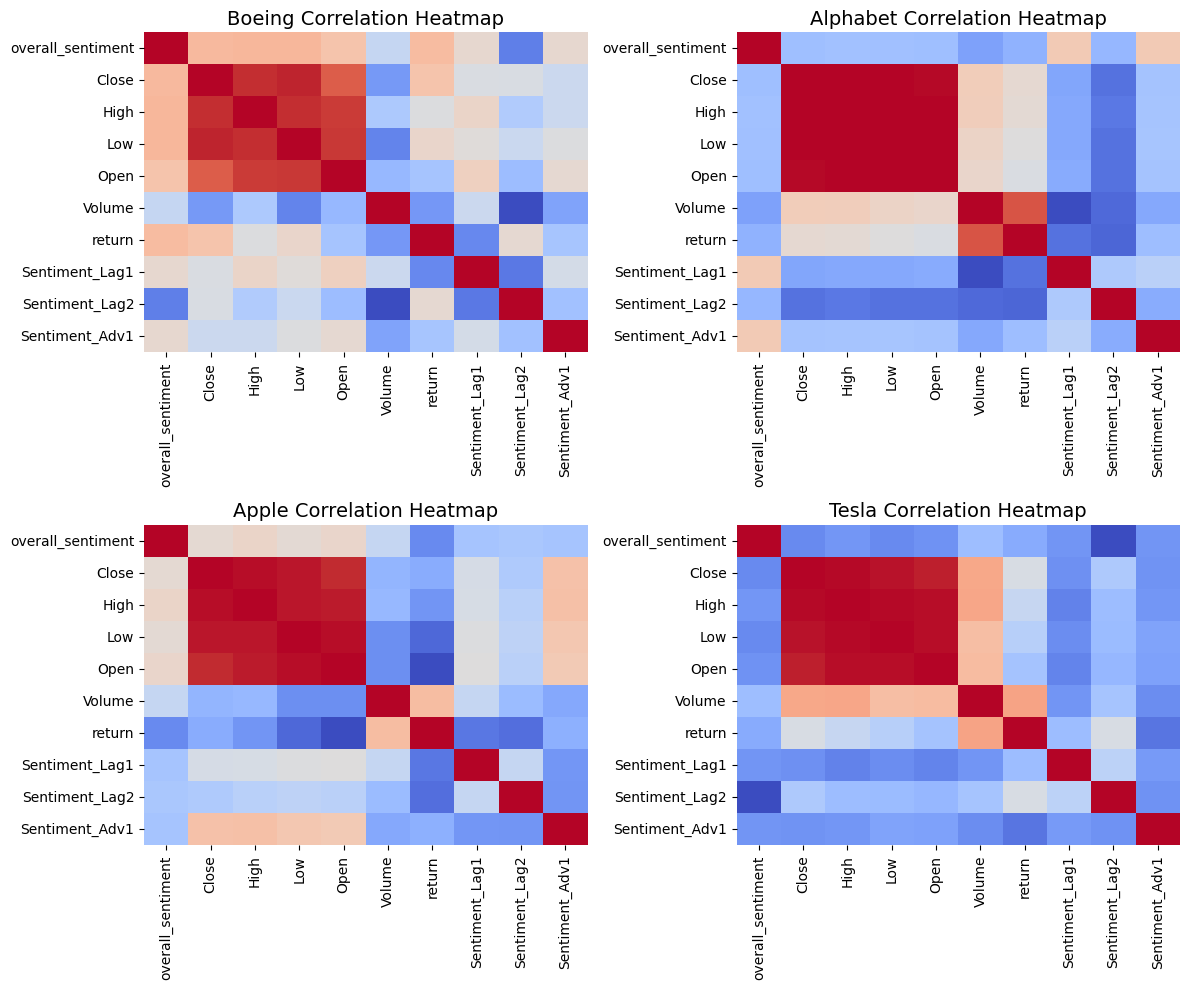

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create subplots grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # adjust rows/cols if more companies
axes = axes.flatten()

for i, (company,df) in enumerate(company_dfs.items()):
        
    # Correlation matrix
    corr = df.corr(numeric_only=True)
    
    # Plot heatmap
    sns.heatmap(corr, cmap="coolwarm", annot=False, ax=axes[i], cbar=False)
    axes[i].set_title(f"{company} Correlation Heatmap", fontsize=14)

plt.tight_layout()
plt.show()


### **Apple**: Sentiment vs Stock Returns

- **Day of origin of the news**: Moderate positive correlation (**+0.36**) → suggests stock moves align with the sentiment of news on the day it actually occurred. 
- **Day of publication**: Weak positive correlation (**+0.17**) → impact exists but mostly priced in.  
- **Lag**: Negative correlations → indicates short-lived impact, with stocks correcting after initial sentiment-driven moves.  

**Insight:** For Apple, unlike some other companies, market reaction is strongest in real time even before news publication and often anticipatory while it tends to reverse in the days following — suggesting highly efficient investor behavior and the possibility of overreaction correction.”


### **Alphabet**: Sentiment vs Stock Returns

- **Lag**: Strong positive correlation (**+0.66**) → market impact unfolds with a delay, suggesting investors take time to digest Alphabet-related news.   
- **Same day**: Slight negative correlation (**-0.14**) → immediate sentiment has little direct effect.  

**Insight:** Alphabet’s news shows a **delayed impact** pattern, where investors initially react cautiously but optimism materializes strongly after two days.

### **Boeing**: Sentiment vs Stock Returns

- **Same day**: Moderate positive correlation (**+0.45**) → stock reacts quickly to news.  
- **Lag 2**: Strong positive correlation (**+0.49**) → impact sustains for a couple of days.  

**Insight:** Boeing’s stock is **highly sensitive to aviation-related news**, showing both immediate and delayed effects. Events such as the **Air India Express crash**, which renewed focus on aircraft safety and Boeing’s role in global aviation, may have amplified news-driven stock movements during this period.


### **Tesla**: Correlation Matrix Insights  
  
- **Overall sentiment** shows **weak and mostly negative correlations** with stock movements → suggesting that sentiment alone doesn’t drive Tesla’s prices strongly.    
- **Lag effects:** Sentiment lagged by 1–2 days has **negative correlations with price levels**, indicating that **delayed sentiment impact is limited or reversed**.  

**Insight:** Although Tesla often dominates headlines, its stock is **not only sentiment-driven**, Tesla’s stock is heavily shaped by **Elon Musk’s persona and loyal fanbase**:  
Musk has built a cult-like following among retail investors who buy into Tesla’s vision regardless of short-term sentiment (loyal fanbase).  
- **His tweets and public statements**: From announcing production milestones to making bold predictions (or even memes), Musk’s posts frequently move the stock price.  



## Tesla Autopilot Case & Stock Reaction (Aug–Sep 2025)

### 📰 News Event  
On **Aug 25, 2025**, Tesla rejected a **$60M settlement** in an Autopilot-related wrongful death case. A jury later awarded **$243M in damages**, seen as a major legal setback. Tesla denied wrongdoing and plans to appeal.

---

Tesla fell **351 → 329** in less than a week (**–6.3%**).

---

### 📊 Significance  
- A **6% drop in a week** is meaningful, even for a volatile stock like Tesla.  
- The fall correlates directly with negative legal news, showing **investor concern over liability and Autopilot risks**.

✅ **Conclusion:** The lawsuit news was a clear catalyst for Tesla’s decline.


In [ ]:
(tesla_df.sort_values('overall_sentiment',ascending=True).head(1))

,entity,title,description,date,content,title_en,description_en,title_sentiment,description_sentiment,overall_sentiment,sentiment_label
2,Tesla,Tesla rejected $60 settlement in Autopilot cas...,Tesla rejected a $60 million settlement in the...,2025-08-26,<ul><li></li><li></li><li></li></ul>\r\nThe co...,Tesla rejected $60 settlement in Autopilot cas...,Tesla rejected a $60 million settlement in the...,-0.5106,-0.93,-0.7203,Negative


## Tesla Boosts Elon Musk with $29B Stock Grant (Aug 4, 2025)

### 📰 News Event
- **Aug 4, 2025** – Tesla’s board approved a **$29 billion stock award** for Elon Musk (96 million shares at $23.34).  
- The move was aimed at **retaining Musk’s leadership** and addressing concerns after legal challenges to his 2018 pay package.  
- Investors viewed this as a **signal of stability and continuity**, which helped sentiment.

---

### 📈 Stock Price Data (Aug 5–12, 2025)

| Date   | Close (USD) |
|--------|-------------|
| Aug 5  | ~310        |        |
| Aug 12 | ~321        |

Tesla’s stock **rose steadily (+3.5%)** in the week following the announcement, reflecting investor approval and confidence in Musk’s leadership.

---

### ✅ Insight
The $29B grant reinforced Musk’s central role at Tesla and **temporarily boosted investor sentiment**.  
This shows how **leadership stability** and alignment of executive incentives can positively influence market confidence, even amid ongoing legal challenges.


In [ ]:
(tesla_df.sort_values('overall_sentiment',ascending=False).head(1))

,entity,title,description,date,content,title_en,description_en,title_sentiment,description_sentiment,overall_sentiment,sentiment_label
4,Tesla,Tesla proposes giving Elon Musk $29 billion so...,Tesla approved a restricted stock award of 96 ...,2025-08-04,<ul><li></li><li></li><li></li></ul>\r\nThe st...,Tesla proposes giving Elon Musk $29 billion so...,Tesla approved a restricted stock award of 96 ...,0.34,0.7003,0.52015,Positive


## Boeing Defense Workers Strike: Pre-Strike & Start (Jul 27 – Aug 5, 2025)

### Key Events
- **Jul 27:** Union rejects Boeing’s initial 4-year contract.  
- **Aug 3:** Union rejects “final” offer, signaling escalation.  
- **Aug 4:** ~3,200 defense workers officially go on strike—the first since 1996. Boeing activates contingency plans using non-union labor.

---

### Stock Price Data (Jul 27 – Aug 5, 2025)

| Date        | Close (USD) |
|-------------|-------------|
| Jul 27      | 220.50      |
| Aug 4       | 222.34      |
| Aug 5       | 224.86      |

---

### Analysis
- **Trend:** Stock remained relatively stable leading up to the strike, with a minor dip on Aug 4 when the strike began.  
- **Interpretation:** Market anticipated the strike but judged Boeing’s contingency measures sufficient, resulting in **limited immediate volatility**.  
- **Takeaway:** Pre-strike negotiation events show how early warning signals can be **absorbed by investors** without major stock disruption.


In [ ]:
(boeing_df.sort_values('overall_sentiment',ascending=True).head(1))

,entity,title,description,date,content,title_en,description_en,title_sentiment,description_sentiment,overall_sentiment,sentiment_label
82,Boeing,Boeing dans la tourmente : une grève historiqu...,"Pour la première fois, les salariés des usines...",2025-08-04,La série noire continue pour Boeing. Depuis pl...,Boeing in turmoil: a historic strike paralyzes...,"For the first time, employees of the manufactu...",-0.6597,-0.4404,-0.55005,Negative


## Korean Air $36B Boeing Order (Aug 26, 2025)

### 📰 News Event
- Korean Air orders **103 Boeing aircraft** (~$36.2B): 20x 777-9, 25x 787-10, 50x 737-10, 8x 777-8 Freighters.  
- Largest-ever order for Korean Air; supports **fleet modernization** and Asiana integration.  
- Expected to **support ~135,000 U.S. jobs**. ([Reuters](https://www.reuters.com/business/aerospace-defense/boeing-receives-36-billion-order-korean-air-2025-08-26/?utm_source=chatgpt.com))

### 📈 Stock Price Data

| Date       | Close (USD) |
|------------|-------------|
| Aug 25     | 226.87      |
| Aug 26     | 234.83      |

### 📊 Analysis
- Stock **jumped ~3.5%** on Aug 26, reflecting strong investor confidence.  
- Highlights how **large corporate orders** can boost stock performance even amid other market volatility.



In [ ]:
(boeing_df.sort_values('overall_sentiment',ascending=False).head(1))

,entity,title,description,date,content,title_en,description_en,title_sentiment,description_sentiment,overall_sentiment,sentiment_label
9,Boeing,Korean Air is giving Boeing a $36 billion boost,"The airline purchased 103 planes from Boeing, ...",2025-08-26,Korean Air is buying 103 Boeing aircraft for $...,Korean Air is giving Boeing a $36 billion boost,"The airline purchased 103 planes from Boeing, ...",0.6249,0.4019,0.5134,Positive


##  Apple vs. Apple Cinemas: Trademark Battle (Aug 5, 2025)

###  News Event
- **Date:** August 5, 2025  
- **Headline:** Apple Inc. sues the owner of Apple Cinemas (Sand Media) over trademark infringement.  
- **Summary:** Apple alleges that the cinema chain is exploiting its well-known name to expand aggressively—including opening locations near Apple’s Cupertino HQ—and creating consumer confusion. The suit seeks to block usage of the “Apple” name and requests unspecified damages. Apple asserts prior warnings and trademark rejection were ignored by the chain. :contentReference[oaicite:0]{index=0}  
- **Response:** Apple Cinemas defended its branding as independent and legally compliant, citing geographic roots and a distinct identity. :contentReference[oaicite:1]{index=1}

---

###  Apple Stock Price (Aug 1 – Aug 8, 2025)

| Date      | Close (USD) |
|-----------|-------------|
| Aug 1     | $223.45     |
| Aug 8     | $220.03     |



---

###  Analysis
- **Abrupt dip**: Apple's stock plunged from **$223.45 → $203.35** between Aug 1 and Aug 5, marking a sharp **–9% drop** ahead of the lawsuit.  
- **Post-news recovery**: After the legal announcement, shares rebounded modestly—from **$202.92 → $220.03** by Aug 8.  

---

###  Insight
The pre-suit decline suggests investor anxiety (possibly tied to broader concerns), while the subsequent rebound indicates that the lawsuit may have been seen as a necessary brand defense rather than a fundamental threat.


In [ ]:
(apple_df.sort_values('overall_sentiment',ascending=False).head(4))

,entity,title,description,date,content,title_en,description_en,title_sentiment,description_sentiment,overall_sentiment,sentiment_label
17,Apple,Twelve South’s 120W charger with Apple Find My...,It’s not every day you come across a wall char...,2025-08-13,<ul><li></li><li></li><li></li></ul>\r\nWe als...,Twelve South’s 120W charger with Apple Find My...,It’s not every day you come across a wall char...,0.4019,0.7935,0.59770,Positive
0,Apple,Meta Has Already Won the Smart Glasses Race,By securing a billion-dollar stake in the worl...,2025-08-25,There's a reason the first successful smart sp...,Meta Has Already Won the Smart Glasses Race,By securing a billion-dollar stake in the worl...,0.7506,0.3182,0.53440,Positive
8,Apple,Google dunks on Apple Intelligence in new Pixe...,Apple sold its iPhone 16 devices last year wit...,2025-08-04,<ul><li></li><li></li><li></li></ul>\r\nApples...,Google dunks on Apple Intelligence in new Pixe...,Apple sold its iPhone 16 devices last year wit...,0.4767,0.5070,0.49185,Positive
15,Apple,Apple’s plan for AI could make Siri the animat...,Apple is developing a bunch of products and fe...,2025-08-13,<ul><li></li><li></li><li></li></ul>\r\nThe la...,Apple’s plan for AI could make Siri the animat...,Apple is developing a bunch of products and fe...,0.4019,0.5719,0.48690,Positive


## Google Antitrust Case: Avoids Breakup, Shares Rally (Early September 2025)

###  News Event  
A U.S. federal judge ruled that Alphabet (Google) would **not be forced to divest** its core assets like Chrome or Android. Instead, the court mandated restrictions on exclusive contracts and required selective data-sharing.  
The decision was broadly seen as a **legal win**, preserving Google’s ecosystem while addressing regulatory concerns

---

# Alphabet (GOOGL) Stock Price (Sep 2–5, 2025)

| Date      | Closing Price (USD) |
|-----------|---------------------|
| Sep 2     | 211.35              |
| Sep 3     | 230.66 (+9%)        |
| Sep 5     | 235.00              |

*(Data shows a sharp jump on Sep 3, followed by continued upward momentum.)*
---


---

###  Insight  
This development underscores how courts may prefer **behavioral remedies over structural breakups**—a trend increasingly influenced by AI-driven competition. The positive stock movement reinforces that investors value **legal certainty** and operational continuity in Big Tech.



In [ ]:
(alphabet_df.sort_values('overall_sentiment',ascending=False).head(3))

,entity,title,description,date,content,title_en,description_en,title_sentiment,description_sentiment,overall_sentiment,sentiment_label
97,Alphabet,"Google proposes Play Store changes in the EU, ...",Samuel Stolton / Bloomberg:\nGoogle proposes P...,2025-08-19,About This Page\r\nThis is a Techmeme archive ...,"Google proposes Play Store changes in the EU, ...",Samuel Stolton / Bloomberg:\nGoogle proposes P...,0.7717,0.8442,0.80795,Positive
93,Alphabet,Сундар Пичаи: от скромного старта до руля техн...,Сундар Пичаи — один из самых влиятельных людей...,2025-08-08,". Alphabet, $1 . , , , , .\r\n : , \r\n -, Goo...",Sundar Pichai: From a modest start to the stee...,Sundar Pichai is one of the most influential p...,0.0000,0.8479,0.42395,Positive
38,Alphabet,Google Investors Surprisingly Chill About Majo...,Alphabet Inc.’s shares closed up slightly from...,2025-08-31,The stock of Google’s parent company ended Fri...,Google Investors Surprisingly Chill About Majo...,Alphabet Inc.’s shares closed up slightly from...,0.2960,0.3322,0.31410,Positive


In [ ]:
for (company,df) in company_dfs.items():
    df['entity'] = company
conc_df = pd.concat(company_dfs.values(),axis=0,ignore_index=True)
conc_df

NameError: name 'company_dfs' is not defined

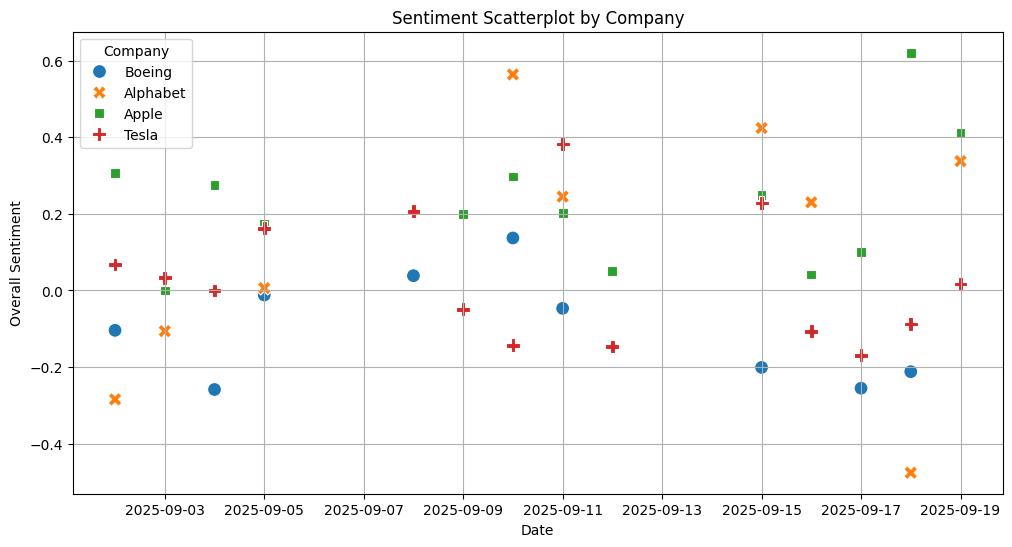

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date to datetime if not already
conc_df['date'] = pd.to_datetime(conc_df['date'])

plt.figure(figsize=(12,6))

# Scatter plot using seaborn
sns.scatterplot(
    data=conc_df,
    x='date',
    y='overall_sentiment',
    hue='entity',       # color by company
    style='entity',     # optional: different markers per company
    s=100               # marker size
)

plt.title("Sentiment Scatterplot by Company")
plt.xlabel("Date")
plt.ylabel("Overall Sentiment")
plt.legend(title="Company")
plt.grid(True)
plt.show()


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')


def preprocess(text):
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHWETA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHWETA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Preprocess title and description separately
tesla_df['processed_title'] = tesla_df['title_en'].fillna('').apply(preprocess)
tesla_df['processed_desc']  = tesla_df['description_en'].fillna('').apply(preprocess)

# Concatenate the processed results
tesla_df['processed_text'] = tesla_df['processed_title'] + ' ' + tesla_df['processed_desc']

C:\Users\SHWETA\AppData\Local\Temp\ipykernel_7548\2675808039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_df['processed_title'] = tesla_df['title_en'].fillna('').apply(preprocess)
C:\Users\SHWETA\AppData\Local\Temp\ipykernel_7548\2675808039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tesla_df['processed_desc']  = tesla_df['description_en'].fillna('').apply(preprocess)
C:\Users\SHWETA\AppData\Local\Temp\ipykernel_7548\2675808039.py:6: SettingWithCopyWarning: 
A value is trying to be set 

In [ ]:
from collections import Counter

In [ ]:
positive_news = tesla_df[tesla_df['sentiment_label']=='Positive']
negative_news = tesla_df[tesla_df['sentiment_label']=='Negative']

def top_keywords(df, n=25):
    all_words = ' '.join(df['processed_text']).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

print("Top Keywords : ", top_keywords(tesla_df))
print("Top Positive Words:", top_keywords(positive_news))
print("Top Negative Words:", top_keywords(negative_news))


Top Keywords :  [('tesla', 65), ('musk', 17), ('new', 14), ('car', 14), ('company', 12), ('elon', 11), ('ev', 9), ('cybertruck', 9), ('ceo', 8), ('want', 8), ('model', 8), ('robotaxi', 8), ('u', 7), ('pay', 6), ('billion', 5), ('million', 5), ('sale', 5), ('say', 5), ('chinese', 4), ('year', 4), ('video', 4), ('ai', 4), ('power', 4), ('electric', 4), ('said', 4)]
Top Positive Words: [('tesla', 34), ('musk', 12), ('new', 9), ('elon', 8), ('car', 8), ('model', 5), ('billion', 4), ('ceo', 4), ('company', 4), ('u', 4), ('million', 3), ('worth', 3), ('pay', 3), ('year', 3), ('ai', 3), ('chinese', 3), ('power', 3), ('uk', 3), ('sale', 3), ('sector', 3), ('say', 3), ('electric', 3), ('suv', 3), ('robotics', 3), ('two', 2)]
Top Negative Words: [('tesla', 30), ('company', 8), ('cybertruck', 8), ('robotaxi', 6), ('want', 6), ('ev', 6), ('musk', 5), ('car', 5), ('video', 4), ('ceo', 4), ('new', 4), ('rejected', 3), ('viral', 3), ('elon', 3), ('pay', 3), ('u', 3), ('model', 3), ('settlement', 2), 

In [ ]:
processed_positive_news = positive_news[['title_en','description_en']].apply(preprocess)
processed_negative_news = negative_news[['title_en','description_en']].apply(preprocess)

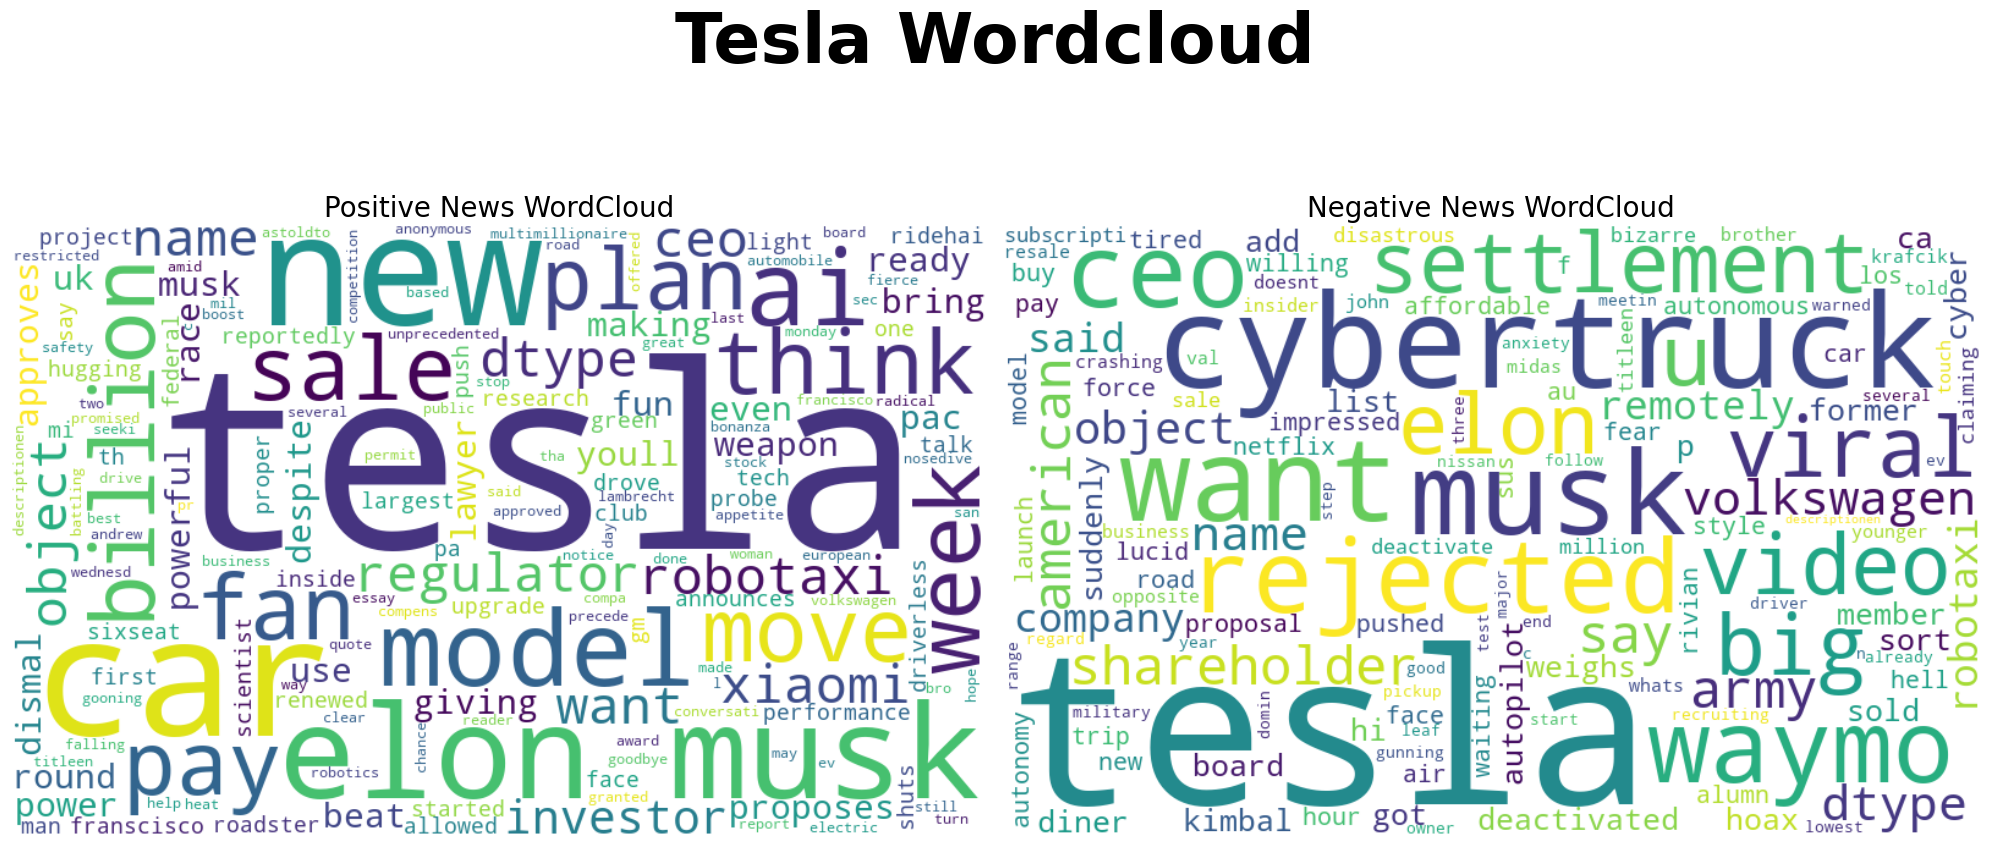

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive news
text_pos = ' '.join(processed_positive_news.dropna().astype(str))

# Negative news
text_neg = ' '.join(processed_negative_news.dropna().astype(str))

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Positive wordcloud
if text_pos.strip():
    wc_pos = WordCloud(width=800, height=500, background_color='white').generate(text_pos)
    axes[0].imshow(wc_pos, interpolation='bilinear')
    axes[0].axis('off')
    axes[0].set_title('Positive News WordCloud', fontsize=20)
else:
    axes[0].text(0.5, 0.5, "No words available", fontsize=15, ha='center', va='center')
    axes[0].axis('off')

# Negative wordcloud
if text_neg.strip():
    wc_neg = WordCloud(width=800, height=500, background_color='white').generate(text_neg)
    axes[1].imshow(wc_neg, interpolation='bilinear')
    axes[1].axis('off')
    axes[1].set_title('Negative News WordCloud', fontsize=20)
else:
    axes[1].text(0.5, 0.5, "No words available", fontsize=15, ha='center', va='center')
    axes[1].axis('off')

plt.suptitle("Tesla Wordcloud",fontweight ='bold',fontsize = 50)
plt.tight_layout()
plt.show()
